# The limits of LDA

Here, we will explore the limitations of LDA and how some of them can be overcome. To this end, two datasets will be used


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os.path
import LDA_TrainEval as LDA_T5
import seaborn as sn
%matplotlib inline

## Preprocess the features
Sometimes, some of the features clearly violate the __linear separability__ assumption made by LDA. Features can be pre-processed by applying a given function to each feature, which yields a Generalized Linear Discriminant analysis:

$$ y = \sum_i^D w_i f_i(\mathbf{x}_i) $$ 

__Task:__ Follow the steps (1) to (4) in the code below.

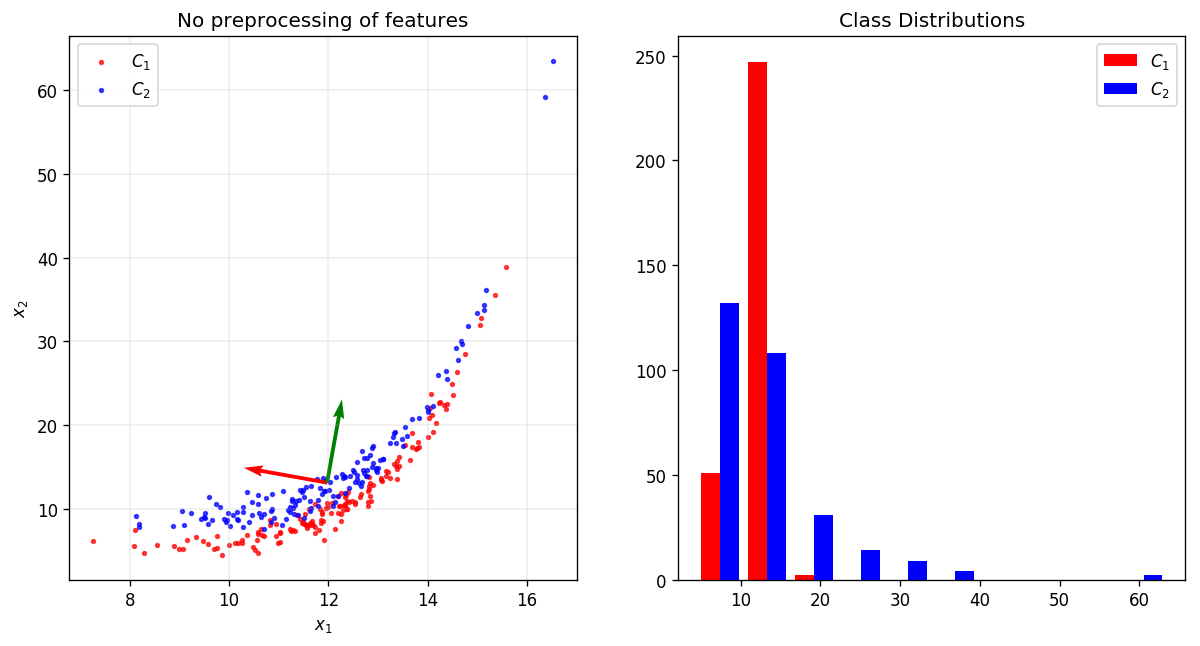

In [10]:
ds_data = 'data/non-lin_train.data'
ds_labels ='data/non-lin_train.labels'
X_train = np.loadtxt(ds_data)
y_train = np.loadtxt(ds_labels)

# 1-> Scatter-plot your 2D-data


fig = plt.figure(dpi=120, figsize=(12,6))
ax = fig.add_subplot(121)
LDA_T5.plotD(X_train, y_train, "No preprocessing of features")
ax=fig.add_subplot(122)
ax.hist(X_train, color=["r", "b"], label = [r"$C_1$", r"$C_2$"])
ax.set_title("Class Distributions")
ax.legend();

#### Q2.4.1) Which LDA assumption(s) are violated by the provided dataset?
     A:  1: Feature data should be normally distributed. As one can see from the plot above, x2 is not distributed normally. It's rather skewed to the left. Which makes the overall feature space non-linear. 
         2: ...
    
#### Q2.4.2) In which way can the feature(s) be preprocessed in order to improve the performance? Hint: Think of polynomials, trigonometric functions, logarithms, exponential functions, etc.
    A: The features should be processed with a filtering function that transforms non-linearity into a  new linear.

The Accuracy on the test set is 91.33 %


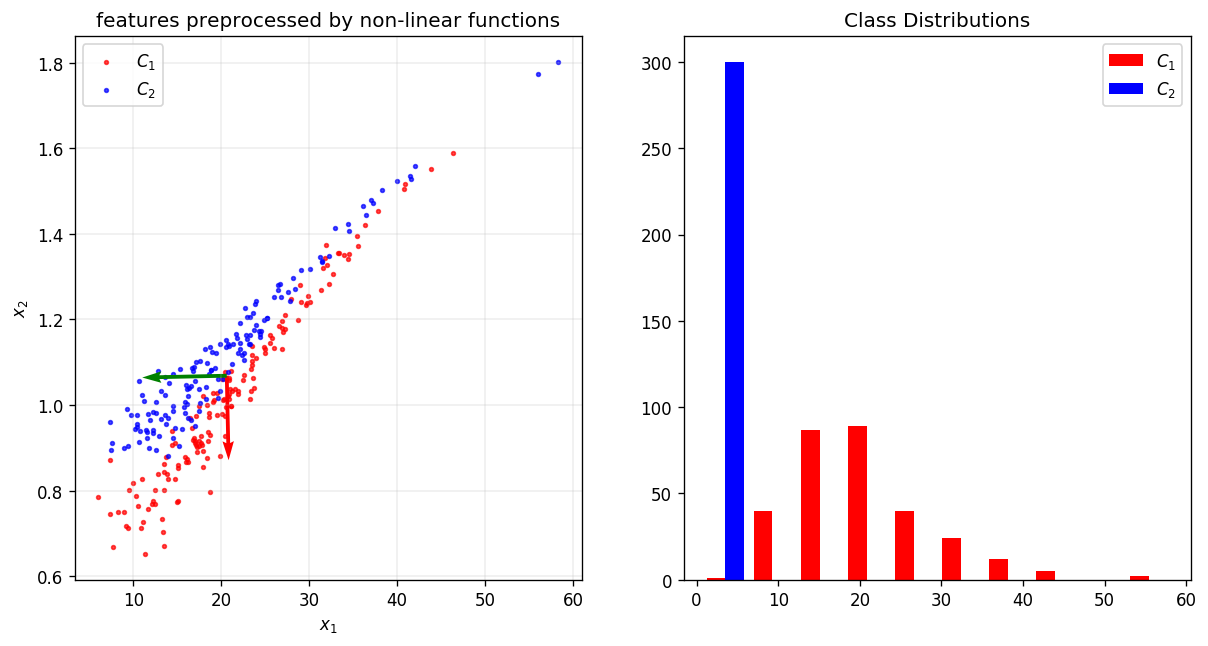

In [11]:
ds_data = 'data/non-lin_test.data'
X_test = np.loadtxt(ds_data)  # (600,2)
y_test = np.loadtxt('./data/non-lin_test.labels')  #


# 2-> Preprocess your features

X_pp = LDA_T5.pProcess(X_train)
fig = plt.figure(dpi=120, figsize=(12,6))
ax = fig.add_subplot(121)
LDA_T5.plotD(X_pp, y_train, "features preprocessed by non-linear functions")
ax=fig.add_subplot(122)
ax.hist(X_pp, color=["r", "b"], label = [r"$C_1$", r"$C_2$"])
ax.set_title("Class Distributions")
ax.legend()


# 3-> Check the performance of your LDA classifier

W, b = LDA_T5.train_lda(X_pp, y_train)  # train LDF

y_hat = LDA_T5.apply_lda(LDA_T5.pProcess(X_test), W, b)  # predict using LDF

LDA_T5.accu(y_test, y_hat)  # test LDF

# 4-> If you think you got it, upload your prediction accuracy to the wiki.
# Done

# 5 -> In addition, upload your implementation to GitLab under git_dir/Assignment2/Q2-4.ipynb
# Done

## Feature extraction
__Tasks:__ 
 1. Visualize the given toy 2D-dataset. 
 2. Train an LDA classifier on the given data. Remember to split your data set into training and validation set. Which performance do you achieve?


There appears to be some exploitable structure in your data, but the LDA is not able to directly capture this.

#### Q2.4.3) In which way can the existing features be combined in order to get a __linearly separable__ dataset? 

__Hint:__ Try to think of it in a 3D way: How would you add another dimension such that the 2 classes can be separated by a plane?

__Tasks__: 
1. Implement your additional feature that combines the existing features. 
2. Calculate the performance of LDA using this additional feature and see if you can improve upon the performance.

In [12]:
%reset -f -s
import numpy as np
import matplotlib.pyplot as plt
import os.path
import LDA_TrainEval as LDA_T5
import seaborn as sn
%matplotlib  inline

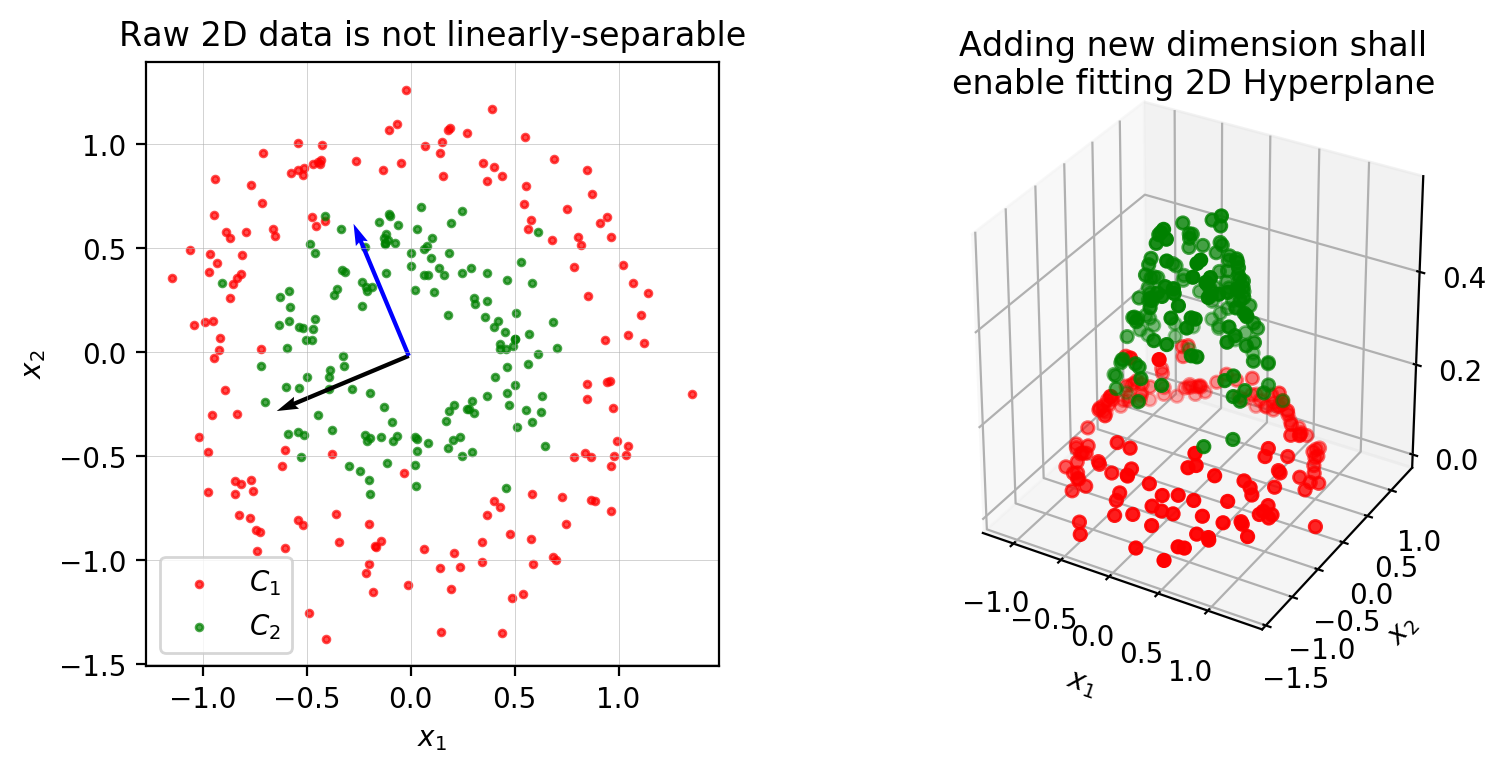

The Accuracy on the test set is 97.98 %
_____________________________________________

Testing a linear Hyperplane at x3 = 0.2	
The Accuracy on the test set is 96.97 %


In [13]:
ds_data = 'data/circles_train.data'
ds_labels ='data/circles_train.labels'
X = np.loadtxt(ds_data)
y = np.loadtxt(ds_labels)

# collecting functions here:
def scatter2D(ax, tiit):
#     f = plt.figure(figsize=(5.5,5))
    ax.scatter(X[y==0][:,0], X[y==0][:,1], marker="o", s=6, alpha=0.7 , c="r")
    ax.scatter(X[y==1][:,0], X[y==1][:,1], marker="o", s=6, alpha=0.7 , c="g")
    mu = np.mean(X[y==0], 0)
    Evec_Cov_X = np.linalg.eigh(np.cov(X, rowvar=False))[1]
    ax.quiver(mu[0], mu[1], Evec_Cov_X[:,0], Evec_Cov_X[:,1],
               color=["k", "b"], scale=4)    
    ax.set_xlabel(r"$x_1$"); ax.set_ylabel(r"$x_2$")
    ax.legend([r"$C_1$", r"$C_2$"])
    ax.set_title(tiit)
    ax.grid(True, lw=0.2)
def scatter3D():
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(9,4), dpi=200)
    ax1 = fig.add_subplot(121, aspect='equal')
    scatter2D(ax1, "Raw 2D data is not linearly-separable")
    ax2 = fig.add_subplot(122, projection='3d', aspect='equal')
    ax2.scatter(X[y==0][:,0], X[y==0][:,1], z_0, color="r")
    ax2.scatter(X[y==1][:,0], X[y==1][:,1], z_1, color="g")
    ax2.set_title("Adding new dimension shall"+"\n"+"enable fitting 2D Hyperplane")
    ax2.set_xlabel(r"$x_1$");ax2.set_ylabel(r"$x_2$");ax2.set_zlabel(r"$z$")
    plt.show()  
def do_LDA(X0, y0, X1, y1):
    """
    In: <Training data, training labels, test data, test labels>
    out: print accuracy of LDA model in console
    """
    W, b = LDA_T5.train_lda(X0, y0)  # train LDF
    y_hat = LDA_T5.apply_lda(X1, W, b)  # predict using LDF
    LDA_T5.accu(y1, y_hat)

# splitting data    
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 1-> Scatter-plot your 2D-data.
# 2-> Combine the 2 existing features so a LDA classifier works
from scipy.stats import multivariate_normal

mu = np.array([0.0, 0.0])
sigma = np.array([1, 1])*0.5
covariance = np.diag(sigma**2)
z_0 = multivariate_normal.pdf(X[y==0], mean=mu, cov=covariance)
z_1 = multivariate_normal.pdf(X[y==1], mean=mu, cov=covariance)
scatter3D()

#setting the features up in new "X"--now with 3Ds
X_train_new = multivariate_normal.pdf(X_train, mean=mu, cov=covariance)
X_train_new = np.concatenate( 
    (X_train, np.reshape(X_train_new, (len(X_train_new),1))), axis=1 )

X_test_new = multivariate_normal.pdf(X_test, mean=mu, cov=covariance)
X_test_new = np.concatenate( 
    (X_test, np.reshape(X_test_new, (len(X_test_new), 1) )), axis=1)


# Doing LDA with new feature    
do_LDA(X_train_new, y_train, X_test_new, y_test)    

# testing a linear Hyperplane at x3 = 0.2
y_hat_notLDA = [0 if _ <0.2 else 1 for _ in X_test_new[:,2] ]
print("_____________________________________________\n")
print("Testing a linear Hyperplane at x3 = 0.2\t")
LDA_T5.accu(y_test, y_hat_notLDA)

## What else can go wrong?

__Task:__ Visualize the data set.

#### Q2.4.4) What LDA assumption(s) are violated by the next dataset? What would be an optimal decision boundary? 

     A: LDA assumes that the class distributions are derived from the same Gaussian and covariance of data from each class is identical. However, That is not the case for the following dataset. 
     
     The scatter of class 2 is much more than that of class 1. Since, Class 2 almost completely surround Class-1's data points, it would probably be best to use an circular (better yet, elliptical) decision boundary centered at the Class-1 mean.
     
#### Q2.4.5 (Bonus): Investigate which method would provide an optimal decision boundary. 
      A: A brief digging on the good old internet suggests that Support Vector Machines may be best suited for this non-linear classification problem.

__Hint:__ It is slightly a more general technique than LDA.

Are the covariance-matrices of Classes identical?	 False


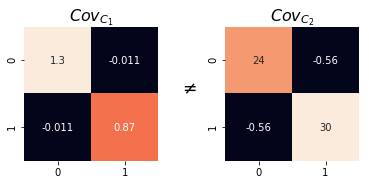

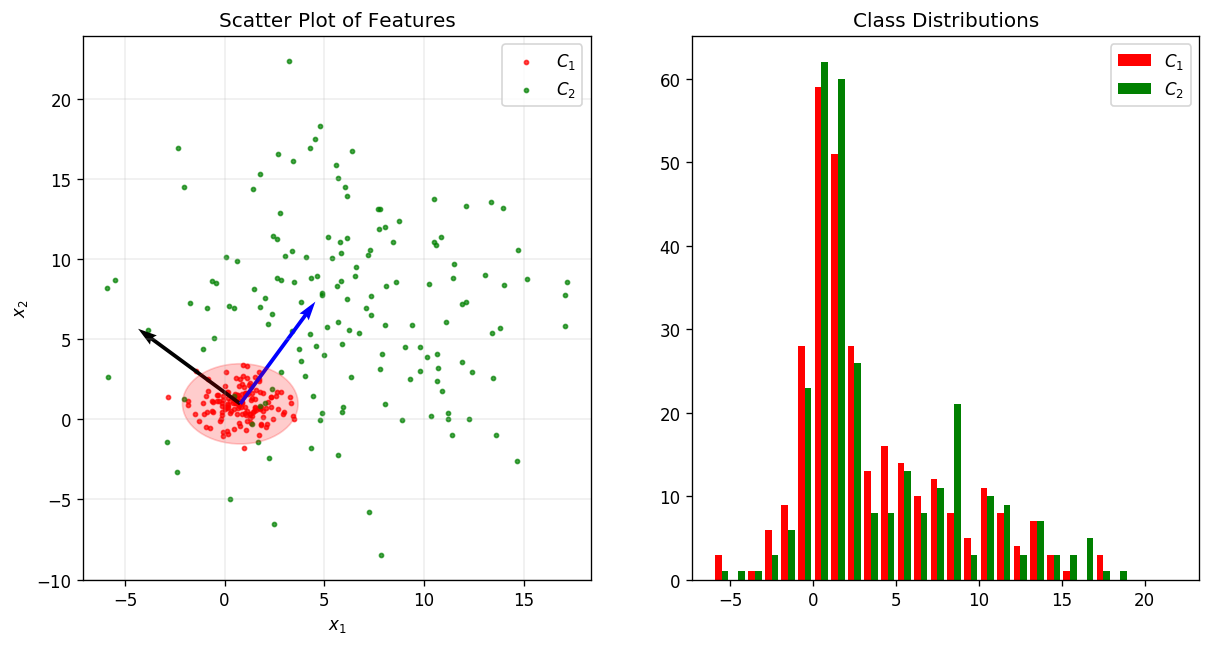

In [14]:
del X, y
ds_data = 'data/unbalanced_train.data'
ds_labels ='data/unbalanced_train.labels'
X = np.loadtxt(ds_data)
y = np.loadtxt(ds_labels)

# What assumption is violated?
cv_c1 = np.cov(X[y==0], rowvar=False)
cv_c2 = np.cov(X[y==1], rowvar=False)
print("Are the covariance-matrices of Classes identical?\t", (cv_c1==cv_c2).all())
fig = plt.figure()
ax = fig.add_subplot(121, aspect='equal')
ax=sn.heatmap(cv_c1, annot=True, cbar=False)
ax.set_title(r"$Cov_{C_1}$", fontsize=16)
ax=fig.add_subplot(122, aspect='equal')
ax=sn.heatmap(cv_c2, annot=True, cbar=False)
ax.set_title(r"$Cov_{C_2}$", fontsize=16)
plt.text(-0.65,+1,r"$\ne$", fontsize="xx-large")
plt.subplots_adjust(wspace=0.5)
plt.show()

# 1-> Scatter-plot your 2D-data.
import matplotlib.patches as patch
fig = plt.figure(dpi=120, figsize=(12,6)); ax = fig.add_subplot(121)

scatter2D(ax, "Scatter Plot of Features")
# ax_c = plt.Circle(np.mean(X[y==0], 0), 2.5, color='r', alpha=0.3)
ax_c = patch.Ellipse(np.mean(X[y==0], 0), 5.8, 5, color='r', alpha=0.2)
ax.add_artist(ax_c)

ax = fig.add_subplot(122)
ax.hist(X, color=["r", "g"], label = [r"$C_1$", r"$C_2$"], bins=range(-6, 23, 1))
ax.legend()
ax.set_title("Class Distributions")
plt.show()



# 2-> What is the optimal decision boundary?
# ax_c shows the optimal decision boundary